**Introduction:**

Processing large amounts text data is an important area in natural language processing. The analysis of text data with machine learning tools can give us important insights. Given a text data such as a book, posts or tweets, one may ask questions such as list of common words.

In this post we are going to analyse 20 news groups dataset. The `Newsgroups` dataset comprises around 18000 newsgroups posts on 20 topics. The dataset can by obtained by using `fetch_20newsgroups` in `sklearn.datasets` as `fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)`

***1: First step is to get the dataset and look into it to get understanding about how it is structured...***

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_full = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
newsgroups_full.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

The `newsgroups_full` dataset has properties and function such as `keys()` which important keys for fetching the details of different types.
For example `target_names` specifies various names of the newsgroups, `target` is 20 different unique index corresponding to target_names
the key `data` is used to get actual data stored in different files having some `filenames`. Lets see how go use different `keys`


In [2]:
# The target names are the names of the news groups
print(newsgroups_full.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
# The data is actual data stred as list
print(newsgroups_full.target_names[newsgroups_full.target[1]])
print(newsgroups_full.data[1])

comp.sys.ibm.pc.hardware
My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt



As we can se the above two statements give us the data about `post` belonging to `comp.sys.ibm.pc.hardware` which contains:

My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


 Please post or email.  Thank you!

Lets put them in a dictionary and see the counts


In [4]:
# Putting the words in the dictionary

newsgroups_full_dnry = dict()

for ind in range(len(newsgroups_full.data)):
    
    grp_name = newsgroups_full.target_names[newsgroups_full.target[ind]]
    
    if grp_name in newsgroups_full_dnry:
    
        newsgroups_full_dnry[grp_name] += 1
    
    else:
        newsgroups_full_dnry[grp_name] = 1


print("Number of articles category wise: ")

print(newsgroups_full_dnry)

Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Total number of articles in dataset 18846
Number of articles category wise: 
{'rec.sport.hockey': 999, 'comp.sys.ibm.pc.hardware': 982, 'talk.politics.mideast': 940, 'comp.sys.mac.hardware': 963, 'sci.e

**1. Pie chart of distribution of the articles **

Text(0.5, 1.0, 'News groups messages distribution')

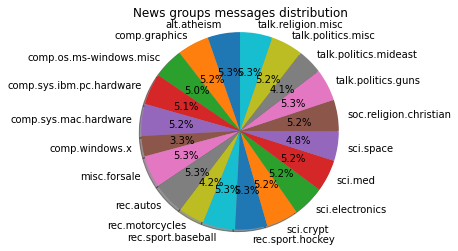

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = newsgroups_full.target_names

slices = []

for key in newsgroups_full_dnry:
    slices.append(newsgroups_full_dnry[key])
    
fig , ax = plt.subplots()

ax.pie(slices, labels = labels , autopct = '%1.1f%%', shadow = True, startangle = 90)

ax.axis("equal")

ax.set_title("News groups messages distribution")


The distribution of messages posted in different newsgroups is almost similar. The sports groups have most number of messages.

Viewing the data as tabular form. We can put the data in the dataframe and see the top ten records.

In [6]:
import pandas as pd

data_labels_map = dict(enumerate(newsgroups_full.target_names))

message, target_labels, target_names = (newsgroups_full.data, newsgroups_full.target, [data_labels_map[label] for label in newsgroups_full.target])

newsgroups_full_df = pd.DataFrame({'text': message, 'source': target_labels, 'source_name': target_names})

print(newsgroups_full_df.shape)

newsgroups_full_df.head(10)

(18846, 3)


,text,source,source_name
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware
5,\n\nBack in high school I worked as a lab assi...,12,sci.electronics
6,\n\nAE is in Dallas...try 214/241-6060 or 214/...,4,comp.sys.mac.hardware
7,"\n[stuff deleted]\n\nOk, here's the solution t...",10,rec.sport.hockey
8,"\n\n\nYeah, it's the second one. And I believ...",10,rec.sport.hockey
9,\nIf a Christian means someone who believes in...,19,talk.religion.misc


[]***2: Next step is cleaning the text...***

To clean the large amounts of text we use `nltk` tools such as `WordNetLemmatizer`, `PorterStemmer`, `stopwords`, `names`. 
Lets import them first

In [7]:
import nltk

from nltk.corpus import names

from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

import re

stopWords = set(stopwords.words('english'))

validwords = set(nltk.corpus.words.words())

`re` is regular expression library in python. We need to first define few functions such as `text_tokenizer`. The main aim is to clean the posts first by removing the alpha-numeric, numeric and non-alphabatic characters then by applying `stemming` and `lemmmatizing` techiniques so that we are left with only the words which are meaningful for the analysis. Lets write the functions for the same.

In [8]:
porter_stemmer = PorterStemmer()

lemmatizer = WordNetLemmatizer()

words = []

def text_tokenizer(str_input):

    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    
    words = [porter_stemmer.stem(word) for word in words if len(word) > 2 ]
    
    return ' '.join(words)

In [9]:
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 2 and word in validwords and word not in stopWords]


***2.1: Next is to apply `text_tokenizer` function to get a new column having clean text...***

In [10]:
newsgroups_full_df['clean_text'] = newsgroups_full_df.text.apply(lambda x: text_tokenizer(x))

newsgroups_full_df.sort_values(by=['source'],inplace=True)

newsgroups_full_df.head(5)

,text,source,source_name,clean_text
8501,\nI could give much the same testimonial about...,0,alt.atheism,could give much the same testimoni about exper...
14285,\nFine... THE ILLIAD IS THE WORD OF GOD(tm) (...,0,alt.atheism,fine the illiad the word god disput not disput...
17533,"Hello Gang,\n\nThere have been some notes rece...",0,alt.atheism,hello gang there have been some note recent as...
1527,"\n Sorry, gotta disagree with you on this one...",0,alt.atheism,sorri gotta disagre with you thi one maddi not...
14271,The latest news seems to be that Koresh will g...,0,alt.atheism,the latest news seem that koresh will give him...



***2.3:Creating a dictionary of newsgroup cleaned text***

In [11]:
wordlst = list()
newsgroup_dic = dict()
label = ''

In [12]:
for i in range(0,20):
    newsgroups_full_df_1 = newsgroups_full_df.loc[newsgroups_full_df['source'] == i]
    for row in newsgroups_full_df_1[['source_name', 'clean_text']].iterrows():
        r = row[1]
        label = r.source_name
        wordlst.append(''.join(map(str,r.clean_text)))
        wordstr = ' '.join(map(str, wordlst))
    newsgroup_dic[label] = wordstr
    label = ''
    wordstr = ''
    wordlst.clear() 

Next steps will create the features out of the dictionary of the newsgroups words just created in the previous steps. In natural language processing feature extraction is an important step. In this case the words themselves becomes the features. To extract the features python provides an important library called `CountVectorizer`. We need to transform our `cleaned_text` using `sklearn.feature_extraction.text` and `CountVectorizer` library. Lets apply it to our newsgroup data.

***3: Feature extraction...***

The feature vector can be created with `sklearn` `CountVectorizer`. When creating the feature vectors we can decide the number of features, as well as set limits for the minimum and maximum number of documents a word can appear.

Note that the transformed data is stored in a `sparse matrix` (which is much more efficient for large data sets).


In [13]:
# First lets import it
from  sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')

The function `get_word_freq_dict_sorted` returns a sorted dictionary of words counts. It taks a dataframe as its argument.

In [14]:
def get_word_freq_dict_sorted(ng_X_df):
    wordfreq = ng_X_df.sum(axis=0)
    features = ng_X_df.columns.tolist()
    counts = wordfreq.tolist()
    wordfreq_df = pd.DataFrame()
    wordfreq_df['word'] = features
    wordfreq_df['count'] = counts
    wordfreq_dict = dict(wordfreq_df.values.tolist())
    wordfreqdict_sorted = dict(sorted(wordfreq_dict.items(), key=lambda x: x[1],reverse=True))
    return wordfreqdict_sorted

Now iterate over the newsgroup dictionary obtained from the newsgroups dataframe and create another dictionary where keys are the newsgroups and values are another dictionary of word counts in that newsgroup. 

In [15]:
ng_dict_of_words = dict()

for key in newsgroup_dic:
    ng_X = count_vectorizer.fit_transform([newsgroup_dic[key]])
    ng_X_df = pd.DataFrame(ng_X.toarray(), columns=count_vectorizer.get_feature_names())
    ng_dict_of_words[key] = get_word_freq_dict_sorted(ng_X_df)
    
ng_dict_of_words['rec.autos']

{'car': 1166,
 'thi': 744,
 'wa': 602,
 'like': 357,
 'ani': 353,
 'use': 344,
 'ha': 326,
 'just': 298,
 'engin': 295,
 'don': 263,
 'know': 252,
 'drive': 235,
 'think': 229,
 'new': 228,
 'good': 223,
 'time': 220,
 'look': 209,
 'year': 209,
 'veri': 207,
 'problem': 197,
 'make': 186,
 'onli': 178,
 'oil': 162,
 'speed': 161,
 'brake': 160,
 'want': 153,
 'dealer': 151,
 'doe': 151,
 'auto': 147,
 'price': 147,
 'ford': 142,
 'buy': 141,
 'right': 140,
 'tire': 140,
 'anyon': 137,
 'thing': 132,
 'work': 132,
 'realli': 131,
 'becaus': 126,
 'chang': 126,
 'mile': 124,
 'peopl': 123,
 'way': 123,
 'power': 120,
 'better': 118,
 'need': 116,
 'driver': 115,
 'say': 115,
 'come': 114,
 'model': 113,
 'road': 112,
 'sinc': 111,
 'wheel': 109,
 'differ': 104,
 'com': 103,
 'tri': 103,
 'list': 100,
 'mani': 100,
 'question': 100,
 'request': 99,
 'got': 98,
 'thank': 96,
 'pleas': 95,
 'lot': 94,
 'post': 92,
 'light': 90,
 'did': 89,
 'point': 89,
 'owner': 88,
 'start': 88,
 'clutch

***4: Exploring words in the news groups..***

QUESTION: What are the top words in newsgroup `comp.sys.ibm.pc.hardware` by their count ?

ANSWER: Iterating over the dictionary corresponding to `comp.sys.ibm.pc.hardware` we get the top ten words as {space  orbit  launch  use  like  time  mission  year  earth  moon}. Like wise we get the most common words in each newsgroup by their count.

In [16]:
word_dic = ng_dict_of_words['comp.sys.ibm.pc.hardware'] 
word_df = pd.DataFrame.from_dict(word_dic, orient='index')
print(word_df.T.iloc[0:1,0:10])

    thi  drive  use  scsi  card  ani  control  disk   ha  work
0  1025    990  792   614   541  477      445   392  390   369


Various other approaches to explore words in news groups include graphical methods, which help us visualize the distribution of words across news groups. We can use `matplotlib.pyplot` to draw differnt graphs.

Next we will explore various algorithms for text classification.

***5 Text Classification...***

Text classification is done using various machine learning algorithms. The most popular ones are

- MultinomialNB
- LogisticRegression
- SVC

The goal of the `text classification` is to predict which newsgroup a post belongs to based on the post text.

`BOW` and `TF-IDF` are two different techniques for text classification

Bag of Words (BoW) is an algorithm that counts frequency of a word in newsgroups. Those word counts allow us to compare different newsgroups and gauge their similarities for applications like search, topic modeling etc.

In `TF-IDF`, words are given weight. TF-IDF measures relevance, not frequency. That is, wordcounts are replaced with TF-IDF scores across the whole dataset.

To use text classification algorithm we need to randomly separates data into training and testing dataset and `fit`  the classifier with selected training data. A `classifer` defines model for text classification. The   `score` gives us the accuracy for testing data. 

Different classifiers can give us different results for accuracy. Accuracy depends on the specific problem, number of categories and differences between them, etc.


***5.1. Splitting into training and testing set...***
`train_test_split`:We need to randomly split the original dataset into two sets, the training and testing sets, which simulate learning data and prediction data respectively. Generally, the proportion of the original dataset to include in the testing split can be 25%, 33.3%, or 40%. We use the train\_test\_split function from scikit-learn to do the random splitting and to preserve the percentage of samples for each class

In [17]:
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter

X_train, X_test, Y_train_source, Y_test_source, train_source_names, test_source_names  = train_test_split(np.array(newsgroups_full_df['clean_text']), np.array(newsgroups_full_df['source']),np.array(newsgroups_full_df['source_name']),test_size=0.2, random_state=101)

#X_train, X_test, Y_train, Y_test = train_test_split(newsgroups_full_df['clean_text'], newsgroups_full_df['source']))

X_train.shape, X_test.shape



((15076,), (3770,))

In [18]:
trd = dict(Counter(train_source_names))
tsd = dict(Counter(test_source_names))

(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd],
 columns=['source_name', 'train_count', 'test_count'])
.sort_values(by=['train_count', 'test_count'],
 ascending=False))

,source_name,train_count,test_count
11,rec.autos,802,188
3,rec.sport.hockey,801,198
18,soc.religion.christian,801,196
8,comp.sys.ibm.pc.hardware,801,181
14,sci.crypt,800,191
5,rec.motorcycles,799,197
7,rec.sport.baseball,798,196
10,sci.electronics,791,193
19,sci.space,789,198
4,comp.windows.x,787,201


***5.1 Build the classifer...***
We will use abasic Bag of Words, the term frequency-based feature engineering model for training our classifer with data using MultiNomialNB

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# build BOW features on train articles

cv = CountVectorizer(stop_words = 'english',binary=False, min_df=2, max_df= 0.95)
cv_train_features = cv.fit_transform(X_train)

# transform test articles into features
cv_test_features = cv.transform(X_test)

print(f'BOW model:> \n Train features shape: \t {cv_train_features.shape},\n Test features shape: \t {cv_test_features.shape}')


BOW model:> 
 Train features shape: 	 (15076, 28082),
 Test features shape: 	 (3770, 28082)


In [20]:

mnb = MultinomialNB(alpha=.05)

mnb.fit(cv_train_features, train_source_names)

mnb_bow_cv_scores = cross_val_score(mnb, cv_train_features, train_source_names, cv=5)

mnb_bow_cv_mean_score = np.mean(mnb_bow_cv_scores)

print('CV Accuracy (5-fold):', mnb_bow_cv_scores)
print('Mean CV Accuracy:', mnb_bow_cv_mean_score)

mnb_bow_test_score = mnb.score(cv_test_features, test_source_names)
print('Test Accuracy:', mnb_bow_test_score)





CV Accuracy (5-fold): [0.70059682 0.72205638 0.72703151 0.72470978 0.71873964]
Mean CV Accuracy: 0.7186268260817926
Test Accuracy: 0.7244031830238726


***6 Evaluation...***

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = mnb.predict(cv_test_features)



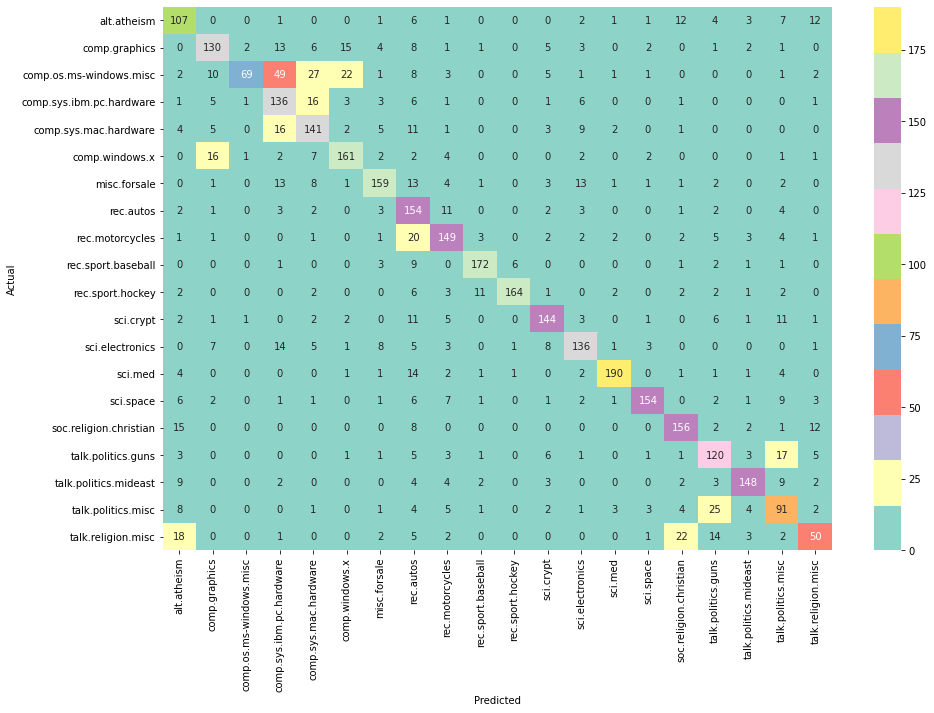

In [22]:

conf_mat = confusion_matrix(test_source_names, Y_pred)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Evaluation of the model can be done using the confusion matrix which can be ploted using the heatmap plot. A basic heatmap is shown below

The confusion matrix depicts the wrongly classified records. For example 4 articles from comp.graphics are wrongly classified as comp.os.ms-windows.misc. There are other performance evaluation indicators which are:

- Precision
- recall
- F1 score
- AUC

`Summary:` Text classifcation has usefull applications in detection of spam pages, personal email sorting, tagging products or document filtering, automatic classification of the text based on its contents, sentiment analysis for moview review data etc. There are different methods and models availble in `sklearn` and `nltp` libraries in python which can be utilized for text classification and natural language processing applications.